# Analyzing Star Wars Survey

In this project, we'll be working with Jupyter notebook and analyzing data on the Star Wars movies. This is part of the guided project series on dataquest. While text and guidance was provided on [dataquest platform](https://www.dataquest.io/), code and analysis is author's work.

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which we downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, we'll be cleaning and exploring the data set in Jupyter notebook.

## Overview

Let's read in the data and explore further.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# check few records
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [125]:
# check columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [126]:
# check dataframe shape - rows and columns
star_wars.shape

(1187, 38)

The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. We'll need to remove any rows with an invalid RespondentID.

In [127]:
# only keep rows with non-null data
star_wars = star_wars[star_wars.RespondentID.notnull()]

# check the shape again to ensure non-nulls are gone
star_wars.shape

(1186, 38)

We can see that there was only one row with a null `RespondentID`, since we have 1187 rows before and 1186 after the filtering.

## Cleaning and Mapping Yes/No Columns

Next, let's take a look and the next two columns:
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be NaN where a respondent chooses not to answer a question. Let's see how many NaN values are in both of the columns.

In [128]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [129]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We can see that the second column contains 350 `NaN` values. Nevertheless, both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

Let's use pandas.Series.map() to convert these values.

In [130]:
# dictionary holding the mapping
yes_no = {"Yes": True, "No": False}

# perform mapping
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

We can rerun the cells above to double check to ensure that the conversion has run.

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace.`
* `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
* `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
* `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
* `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
* `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

Next, we will rename each of the columns to make it easier to read. For example, we will rename the columns `Which of the following Star Wars films have you seen? Please select all that apply.` to `seen_1` and the rest of the `Unnamed` accordingly.

In [131]:
# set up the mapping dictionary for each column
seen_1_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}
seen_2_dict = {
    "Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False
}
seen_3_dict = {
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False
}
seen_4_dict = {
    "Star Wars: Episode IV  A New Hope": True,
    np.NaN: False
}
seen_5_dict = {
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False
}
seen_6_dict = {
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

# dictionary to rename each of the columsn
rename_cols = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
}

# rename columns
star_wars = star_wars.rename(columns=rename_cols)

# map the values to each of the columns
for col in star_wars.columns[3:9]:
    col_dict = str(col) + "_dict"
    star_wars[col] = star_wars[col].map(eval(col_dict))

In [132]:
# check columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

In [133]:
# check values
star_wars["seen_1"].value_counts()

True     673
False    513
Name: seen_1, dtype: int64

We can see that we have successfully renamed the columns and converted the movie values into the boolean values.

## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [134]:
# convert necessary columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# dictionary holding columns values to be renamed
rename_cols = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

# rename columns
star_wars = star_wars.rename(columns=rename_cols)

# check columns
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. Let's compute the mean of each ranking column.

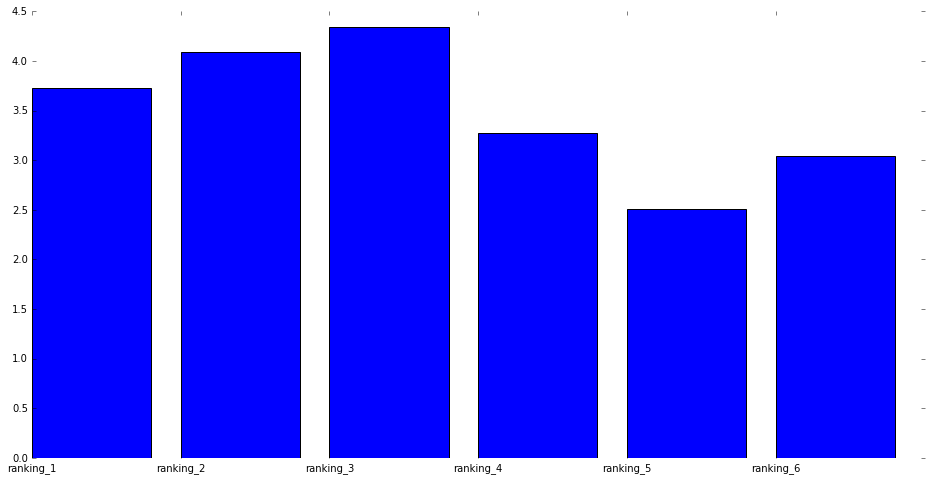

In [135]:
# star wars average rankings
average_rankings = star_wars[star_wars.columns[9:15]].mean()

# bar plot of average rankings
fig, ax = plt.subplots(figsize=(16,8))
groups = 6
lefts = np.arange(groups)
ax.bar(lefts, average_rankings, tick_label=average_rankings.index)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.show()

The above charts shows that `Star Wars: Episode V The Empire Strikes Back` is the movie most preferred by the respondents, since the lower ranking indicates preference for that movie. Overall, it seems that Star Wars Episodes IV, V, VI have lower rankings indicating a general trend where respondents prefer the latest Star Wars movies.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. We will use that information to find out the most viewed movie.

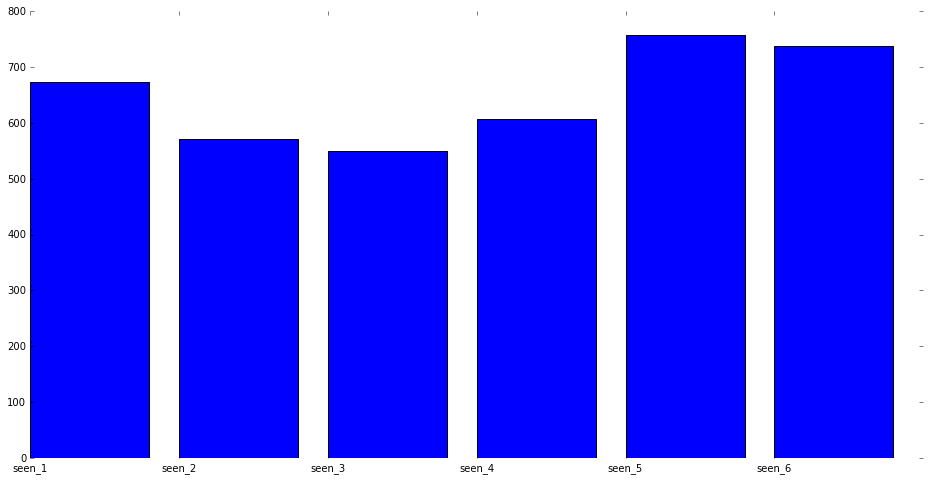

In [140]:
# compute the sum of each seen column
seen_movies = star_wars[star_wars.columns[3:9]].sum()

# display a bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(lefts, seen_movies, tick_label=seen_movies.index)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.show()

We can observe from the chart the on Star Wars Episode IV has been seen most by our respondents the most. The last two movies in the series have been seen the most, which could also help explain why the rankings for those are high.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples: 

* `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
* `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
* `Gender` - `Male` or `Female`

We can calculate the highest ranked and seen movies by grouping our respondents into the segments using above mentioned criteria. Simply put, we can see what are most ranked and seen movies by star wars fans and/or males or females.

### Exploring by Gender

Let's segment our groups by gender and find out the movie rankings and views according to that.

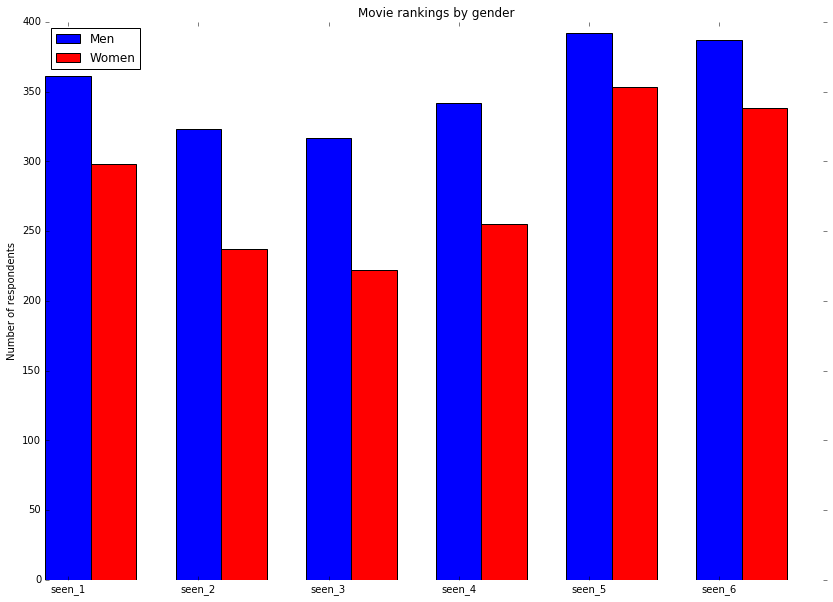

In [170]:
# filter the dataset by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# calculate the sum of each movie columns for males
males_seen_movies = males[males.columns[3:9]].sum()
female_seen_movies = females[females.columns[3:9]].sum()

# display bar chart
fig, ax = plt.subplots(figsize=(14, 10))
width=0.35
mg = ax.bar(lefts, males_seen_movies, width)
fmg = ax.bar(lefts + width, female_seen_movies, width, color="red")
ax.set_title("Movie seen by gender")
ax.set_xticks(lefts + width/2)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.legend((mg[0], fmg[0]), ('Men', 'Women'), loc='upper left', fontsize=12)
ax.set_xticklabels(males_seen_movies.index)
ax.set_ylabel("Number of respondents")
plt.show()

We can see from the comparative bar chart above that on average women have seen less Star Wars movies than males have, indicating a difference in preference for the movies across franchise. Let's look at rankings.

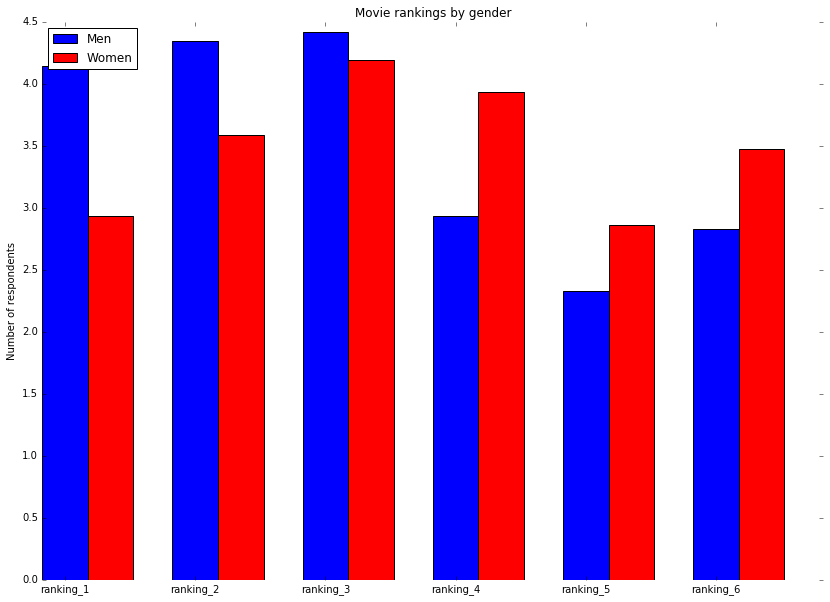

In [179]:
# calculate the sum of each movie columns for males
males_rank_movies = males[males.columns[9:15]].mean()
female_rank_movies = females[females.columns[9:15]].mean()

# display bar chart
fig, ax = plt.subplots(figsize=(14, 10))
width=0.35
mg = ax.bar(lefts, males_rank_movies, width)
fmg = ax.bar(lefts + width, female_rank_movies, width, color="red")
ax.set_title("Movie rankings by gender")
ax.set_xticks(lefts + width/2)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.legend((mg[0], fmg[0]), ('Men', 'Women'), loc='upper left', fontsize=12)
ax.set_xticklabels(males_rank_movies.index)
ax.set_ylabel("Number of respondents")
plt.show()

It's possible to conclude that females on average ranked the latest Star Wars franchise movies high compared to males. This might be due to various reasons, which would be difficult to understand using only this dataset.

### Exploring data by fandom

It would be interesting to now look at our data after segmenting the respondents by fandom, that is dividing them into respondents who consider themselves fans of the franchise and those that do not.

In [177]:
# filter the dataset by fandom
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
nofans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
print(fans.shape)
print(nofans.shape)

(552, 38)
(284, 38)


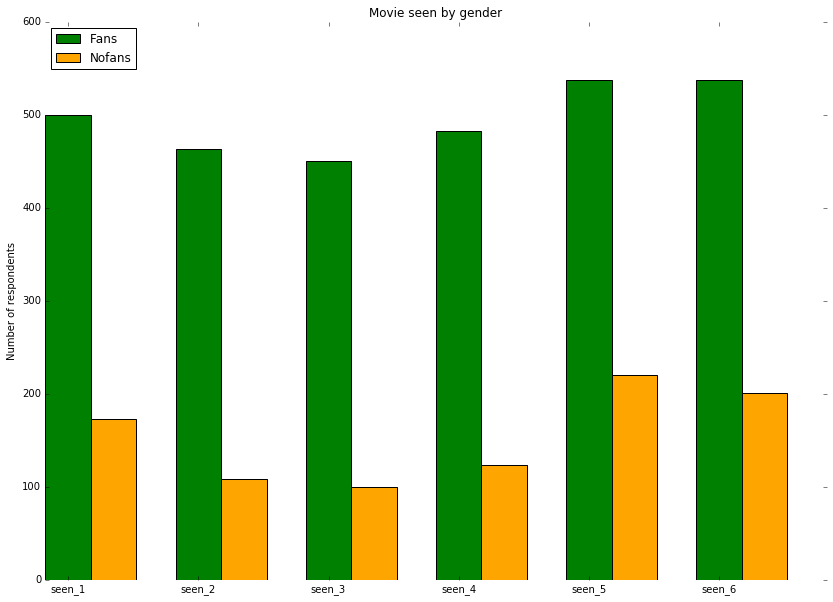

In [178]:
# calculate the sum of each movie columns for males
fan_seen_movies = fans[fans.columns[3:9]].sum()
nofan_seen_movies = nofans[nofans.columns[3:9]].sum()

# display bar chart
fig, ax = plt.subplots(figsize=(14, 10))
width=0.35
mg = ax.bar(lefts, fan_seen_movies, width, color="green")
fmg = ax.bar(lefts + width, nofan_seen_movies, width, color="orange")
ax.set_title("Movie seen by fandom")
ax.set_xticks(lefts + width/2)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.legend((mg[0], fmg[0]), ('Fans', 'Nofans'), loc='upper left', fontsize=12)
ax.set_xticklabels(fan_seen_movies.index)
ax.set_ylabel("Number of respondents")
plt.show()

As one would have expected, most of our respondents in the survey are fans and the bar chart shows that for each movies there are more fans than nonfans who have seen the movie. What about rankings?

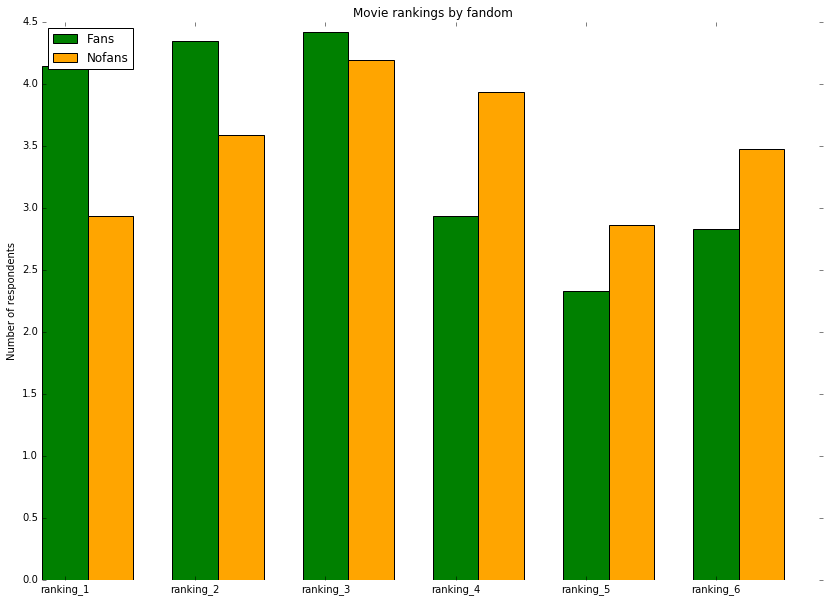

In [180]:
# calculate the sum of each movie columns for males
fan_seen_movies = fans[fans.columns[9:15]].mean()
nofan_seen_movies = nofans[nofans.columns[9:15]].mean()

# display bar chart
fig, ax = plt.subplots(figsize=(14, 10))
width=0.35
mg = ax.bar(lefts, fan_seen_movies, width, color="green")
fmg = ax.bar(lefts + width, nofan_seen_movies, width, color="orange")
ax.set_title("Movie rankings by fandom")
ax.set_xticks(lefts + width/2)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.legend((mg[0], fmg[0]), ('Fans', 'Nofans'), loc='upper left', fontsize=12)
ax.set_xticklabels(fan_seen_movies.index)
ax.set_ylabel("Number of respondents")
plt.show()

The above bar chart is quite interesting. It seems that fans have ranked latest Star Wars franchise movies lower than non-fans, potentially indicating that those who are into the franchise may feel that the further versions did not have same quality or effect compared to the initial movies of the franchise. While this might be one of the reasons, it's not possible to conclude from this chart.

## Summary and Further Analysis

We came to the end of our guided project analysis of Star Wars Survey. We have explored the dataset by looking at highest seen and ranked movies as well as explored those metrics by segments. While this helps us better understand that fact that movies like Empire strikes back is the best of the bunch due to its ratings, we could also explore further and look into:

* Ranking and view metrics by other segments such as `Education`, `Location (Census Region)` and `Which character shot first?`. 
* Explore data on characters the respondents view favorably and unfavorably

If you would like to explore this questions, please feel free to fork this notebook and get on with having fun with the data.